# Initialize

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Classifier Libraries
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pennylane as qml
from pennylane import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dropout

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [4]:
import sys
import importlib

# Import and reload the module
sys.path.append("../")
import Scripts.data_process_utils as dpu
importlib.reload(dpu)

<module 'Scripts.data_process_utils' from '/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/Submision/Experiments/../Scripts/data_process_utils.py'>

In [5]:
import Scripts.evaluation_functions as eval
import importlib
importlib.reload(eval)

<module 'Scripts.evaluation_functions' from '/Users/epameinondasdouros/Personal/Quantum/Code/Final_Project/Submision/Experiments/../Scripts/evaluation_functions.py'>

# Data Loading

In [9]:
finance_df=pd.read_csv("../.././Datasets/PS_20174392719_1491204439457_log.csv",delimiter=',')
finance_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
df=finance_df

In [11]:
df=finance_df

### Cleaning

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_cleaned = finance_df.loc[(finance_df['type'].isin(['CASH_OUT', 'TRANSFER'])),:]
df_cleaned.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],inplace=True)
df_cleaned['type'] = finance_df['type'].map({'CASH_OUT': 0, 'TRANSFER': 1})

df_smote_balanced = dpu.balance_with_smote(df_cleaned, target_col='isFraud', smote_ratio=0.1, random_state=42)
fraud_count_smote, fraud_percentage_smote = dpu.count_fraud_percentage(df_smote_balanced)
print(f"After SMOTE - Fraudulent: {fraud_count_smote}, Fraud Percentage: {fraud_percentage_smote:.2f}%")

final_df=df_smote_balanced

final_df = final_df.sort_values(by='step').astype(float)

df=final_df

y = df['isFraud']
X = df.drop(columns=['isFraud'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit only on training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # ✅ Fit only on train
X_test = scaler.transform(X_test)  # ✅ Use same scaler but don't fit again

/var/folders/_2/qt54y181481c0ncq4fj6g0940000gn/T/ipykernel_62608/4089061607.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],inplace=True)
/var/folders/_2/qt54y181481c0ncq4fj6g0940000gn/T/ipykernel_62608/4089061607.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['type'] = finance_df['type'].map({'CASH_OUT': 0, 'TRANSFER': 1})


After SMOTE - Fraudulent: 276219, Fraud Percentage: 9.09%


In [13]:
X_train.shape

(2430732, 7)

In [14]:
X_test.shape

(607683, 7)

Defining a QNode
================



In [14]:
import pennylane as qml
import numpy as np

n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits+1)

from itertools import combinations

def custom_layer(weights, n_qubits):
    index = 0  # Initialize index to track unique weights

    # Apply first set of RY gates
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1  # Increment index

    # Apply first set of CNOT gates
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply second set of RY gates
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1  # Increment index

    # Apply second set of CNOT gates
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply RY gates on qubit 3
    qml.RY(weights[index], wires=3)
    index += 1  # Increment index
    qml.RY(weights[index], wires=3)
    index += 1  # Increment index

    # Apply nested RY gates for two layers
    for j in range(2):
        for i in range(n_qubits):
            qml.RY(weights[index], wires=i)
            index += 1  # Increment index

    # Apply third set of CNOT gates
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply final set of RZ gates
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1  # Increment index

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    # print("AAAAAAAAAAAAAAAAAAAAA")
    # i=0
    for w in weights:
        # print(i)
        custom_layer(w,n_qubits)
        # i+=1
    outputs = [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]
    return outputs


In [15]:
import pennylane as qml
import numpy as np

n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits+1)

from itertools import combinations

def custom_layer_long(weights, n_qubits):
    index = 0  # Start index for weights

    # First block of RY
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1

    # First set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Second block of RY
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1

    # Second set of CNOT pairs
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Third block of RY (single qubit repeated)
    qml.RY(weights[index], wires=3)
    index += 1
    qml.RY(weights[index], wires=3)
    index += 1

    # Nested loop of RY
    for j in range(2):
        for i in range(n_qubits):
            qml.RY(weights[index], wires=i)
            index += 1

    # Third set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # First block of RZ
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1

    # Fourth set of CNOT pairs
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Fourth block of RY (single qubit repeated)
    qml.RY(weights[index], wires=3)
    index += 1
    qml.RY(weights[index], wires=3)
    index += 1

    # Second block of RZ
    for i in range(n_qubits):
        qml.RZ(weights[index], wires=i)
        index += 1

    # Third block of RY
    for i in range(n_qubits):
        qml.RY(weights[index], wires=i)
        index += 1

    # Fifth set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Final block of RZ
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1

    return index  # Total number of indices used

@qml.qnode(dev)
def qnode_long(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    # print("AAAAAAAAAAAAAAAAAAAAA")
    # i=0
    for w in weights:
        # print(i)
        custom_layer_long(w,n_qubits)
        # i+=1
    outputs = [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]
    return outputs

In [16]:
@qml.qnode(dev)
def qnode_long_solo(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    for w in weights:
        custom_layer_long(w,n_qubits)
    outputs = [qml.expval(qml.PauliZ(wires=0)),qml.expval(qml.PauliZ(wires=1))]
    return outputs

# Quantum Circuit



In [17]:
import pennylane as qml
import matplotlib.pyplot as plt

In [18]:
n_layers = 1
n_qubits=3
total_weights = 3 * (n_qubits + 1) + 2 * n_qubits + 2

weight_shapes = {"weights": (n_layers, total_weights+1)}

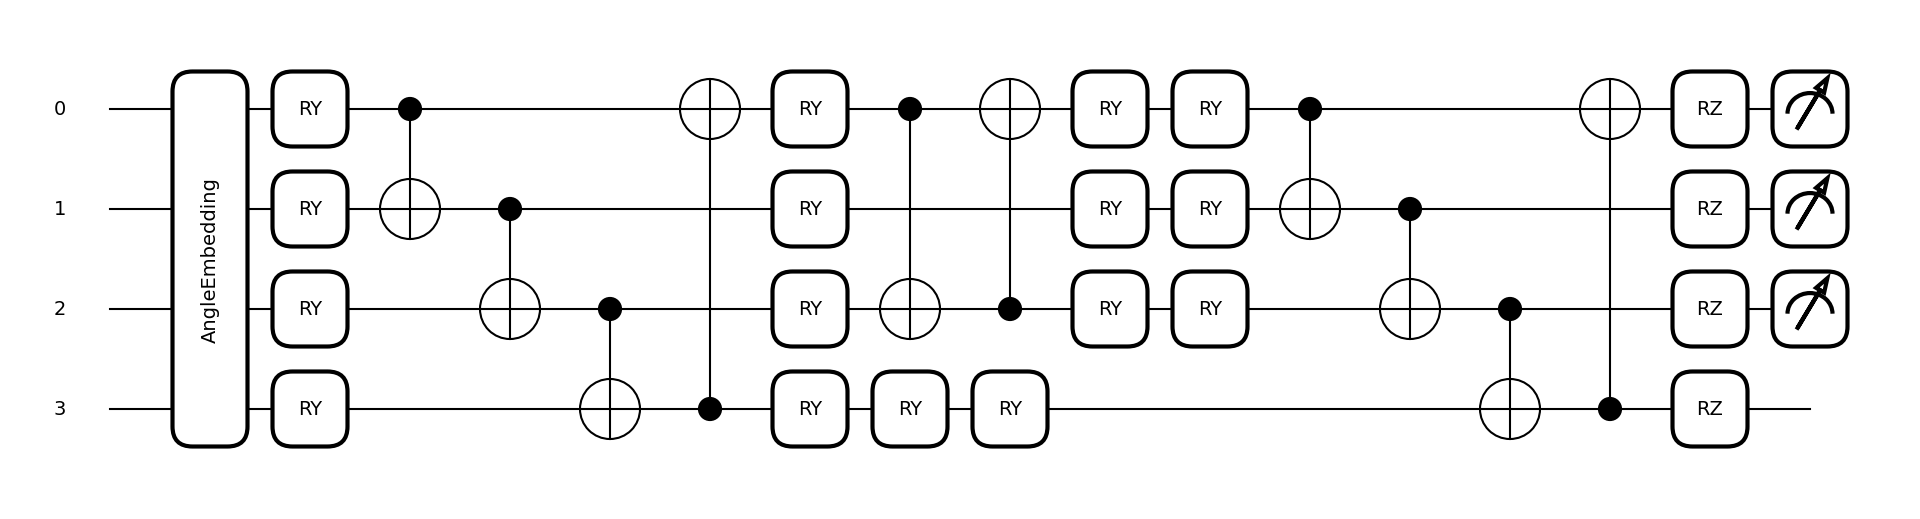

In [19]:
weights = np.random.random(size=(n_layers, total_weights))
fig, ax = qml.draw_mpl(qnode)(X_train[:, :4], weights)
plt.show()

In [20]:
n_layers = 1
n_qubits=3
total_weights_long = 32
print("Total weights required:", total_weights_long)

weight_shapes_long = {"weights": (n_layers, total_weights_long+1)}

Total weights required: 32


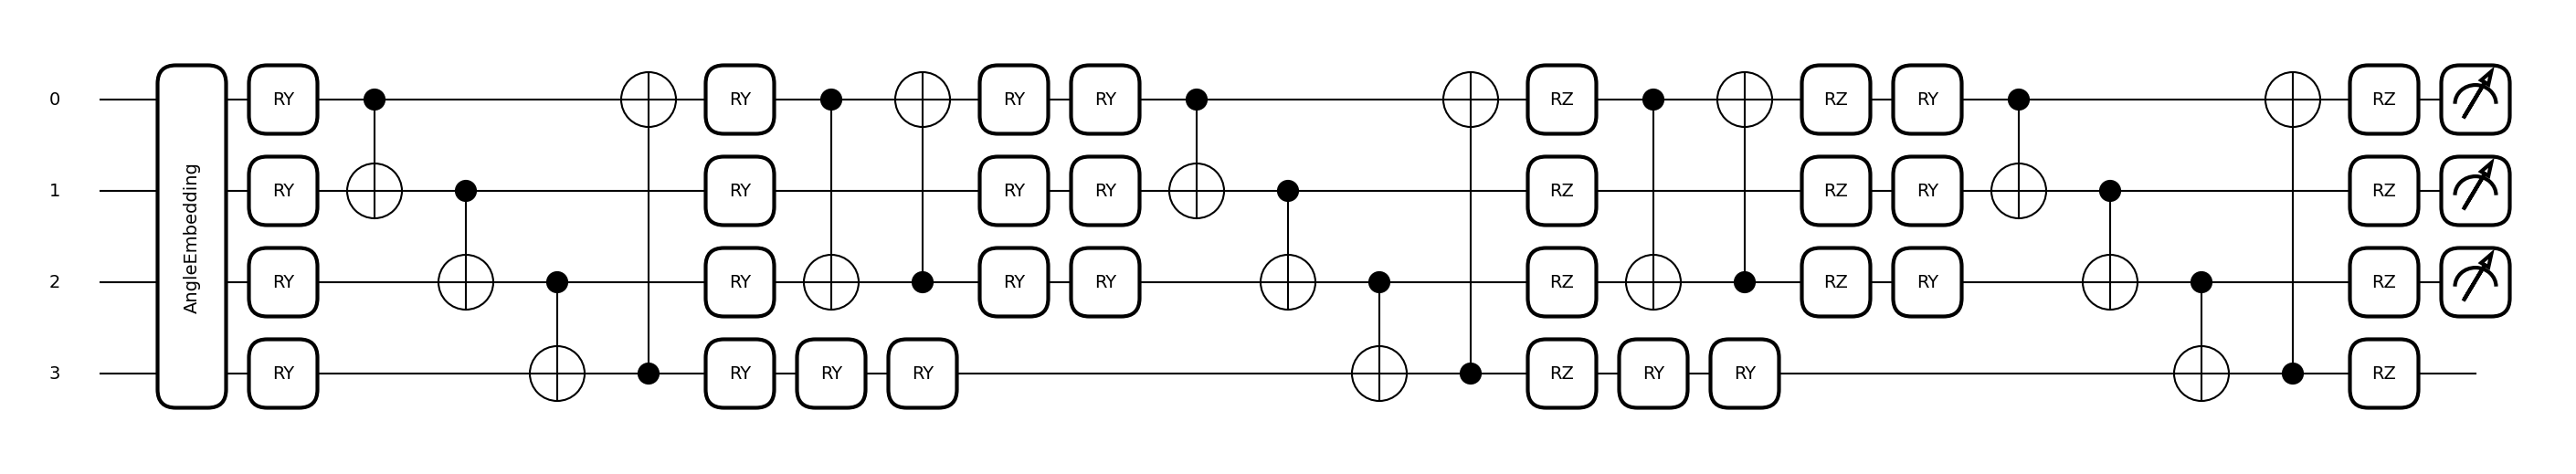

In [21]:
weights = np.random.random(size=(n_layers, total_weights_long))
fig, ax = qml.draw_mpl(qnode_long)(X_train[:, :4], weights)

plt.show()

In [22]:
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

In [23]:
qlayer_long = qml.qnn.KerasLayer(qnode_long, weight_shapes_long, output_dim=n_qubits)

# Checking The Influence of Quantum Model

For this to be implemented we lowered the amount of data used to have a faster run of the quantum circuit

In [24]:
X_train.shape[1]

7

In [40]:
from sklearn.metrics import classification_report

In [41]:
n_layers = 1
n_qubits=3
total_weights_long = 32
print("Total weights required:", total_weights_long)

weight_shapes_long = {"weights": (n_layers, total_weights_long+1)}

Total weights required: 32


In [42]:
qlayer_long = qml.qnn.KerasLayer(qnode_long, weight_shapes_long, output_dim=n_qubits)

In [29]:
import os
import json
os.makedirs("../experiment_7_long_layer", exist_ok=True) 
for i in range(5):
    print(f"Iteration {i+1}")

    print("Evaluating Classic Model")
    print("====================================================================================================================================")
    # Classic model
    classic_model = Sequential([
        Dense(4, activation=tf.nn.relu, input_shape=(X_train.shape[1],)),
        Dense(2, activation=tf.nn.softmax)
    ])
    classic_model.compile(optimizer=Adam(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    with tf.device('/CPU:0'):
        classical_history=classic_model.fit(X_train, y_train, validation_split=0.2, batch_size=1024, epochs=10, shuffle=True, verbose=1)
    eval.evaluate_model(classic_model, X_test, y_test)
    # Save entire model (architecture + weights)
    classic_model.save(f"../experiment_7_long_layer/classic_model_iteration_{i+1}.h5")
    # Save only the weights
    classic_model.save_weights(f"../experiment_7_long_layer/classic_model_iteration_{i+1}_weights.h5")
    
        # Save training history as JSON
    with open(f"../experiment_7_long_layer/classic_model_iteration_{i+1}_history.json", "w") as f:
        json.dump(classical_history.history, f)
    
for i in range(5):
    print("Evaluating Quantum Model")
    print("====================================================================================================================================")

    quantum_model = Sequential([
        Dense(4, activation=tf.nn.relu, input_shape=(X_train.shape[1],)),
        qlayer_long,
        Dense(2, activation=tf.nn.softmax)
    ])

    quantum_model.compile(optimizer=Adam(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    with tf.device('/CPU:0'):
        quantum_history=quantum_model.fit(X_train, y_train, validation_split=0.2, batch_size=1024, epochs=10, shuffle=True, verbose=1)
    
    eval.evaluate_model(quantum_model, X_test, y_test)
    
    # Save entire model
    quantum_model.save(f"../experiment_7_long_layer/quantum_model_iteration_{i+1}.h5")
    # Save only the weights
    quantum_model.save_weights(f"../experiment_7_long_layer/quantum_model_iteration_{i+1}_weights.h5")

    # Save training history as JSON
    with open(f"../experiment_7_long_layer/quantum_model_iteration_{i+1}_history.json", "w") as f:
        json.dump(quantum_history.history, f)
    
    print("====================================================================================================================================")


Iteration 1
Evaluating Classic Model
Epoch 1/10


/Applications/anaconda3/envs/q_env_2/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-02-06 10:52:24.655394: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1900/1900 [==============================] - 1s 537us/step - loss: 0.0971 - accuracy: 0.9684 - val_loss: 0.0523 - val_accuracy: 0.9813
Epoch 2/10
1900/1900 [==============================] - 1s 479us/step - loss: 0.0463 - accuracy: 0.9837 - val_loss: 0.0423 - val_accuracy: 0.9833
Epoch 3/10
1900/1900 [==============================] - 1s 460us/step - loss: 0.0387 - accuracy: 0.9868 - val_loss: 0.0375 - val_accuracy: 0.9881
Epoch 4/10
1900/1900 [==============================] - 1s 506us/step - loss: 0.0332 - accuracy: 0.9885 - val_loss: 0.0315 - val_accuracy: 0.9891
Epoch 5/10
1900/1900 [==============================] - 1s 507us/step - loss: 0.0299 - accuracy: 0.9897 - val_loss: 0.0270 - val_accuracy: 0.9908
Epoch 6/10
1900/1900 [==============================] - 1s 442us/step - loss: 0.0274 - accuracy: 0.9907 - val_loss: 0.0367 - val_accuracy: 0.9860
Epoch 7/10
1900/1900 [==============================] - 1s 442us/step - loss: 0.0256 - accuracy: 0.9914 - val_loss: 0.0250 - val_accura

/Applications/anaconda3/envs/q_env_2/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1900/1900 [==============================] - 1s 497us/step - loss: 0.0681 - accuracy: 0.9783 - val_loss: 0.0385 - val_accuracy: 0.9867
Epoch 2/10
1900/1900 [==============================] - 1s 466us/step - loss: 0.0346 - accuracy: 0.9873 - val_loss: 0.0350 - val_accuracy: 0.9842
Epoch 3/10
1900/1900 [==============================] - 1s 473us/step - loss: 0.0291 - accuracy: 0.9893 - val_loss: 0.0281 - val_accuracy: 0.9919
Epoch 4/10
1900/1900 [==============================] - 1s 483us/step - loss: 0.0254 - accuracy: 0.9907 - val_loss: 0.0227 - val_accuracy: 0.9918
Epoch 5/10
1900/1900 [==============================] - 1s 479us/step - loss: 0.0230 - accuracy: 0.9919 - val_loss: 0.0295 - val_accuracy: 0.9882
Epoch 6/10
1900/1900 [==============================] - 1s 471us/step - loss: 0.0218 - accuracy: 0.9925 - val_loss: 0.0191 - val_accuracy: 0.9936
Epoch 7/10
1900/1900 [==============================] - 1s 464us/step - loss: 0.0202 - accuracy: 0.9931 - val_loss: 0.0195 - val_accura

/Applications/anaconda3/envs/q_env_2/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1900/1900 [==============================] - 1s 517us/step - loss: 0.1093 - accuracy: 0.9663 - val_loss: 0.0617 - val_accuracy: 0.9791
Epoch 2/10
1900/1900 [==============================] - 1s 478us/step - loss: 0.0558 - accuracy: 0.9817 - val_loss: 0.0525 - val_accuracy: 0.9836
Epoch 3/10
1900/1900 [==============================] - 1s 472us/step - loss: 0.0447 - accuracy: 0.9854 - val_loss: 0.0381 - val_accuracy: 0.9859
Epoch 4/10
1900/1900 [==============================] - 1s 469us/step - loss: 0.0354 - accuracy: 0.9879 - val_loss: 0.0324 - val_accuracy: 0.9892
Epoch 5/10
1900/1900 [==============================] - 1s 496us/step - loss: 0.0319 - accuracy: 0.9889 - val_loss: 0.0335 - val_accuracy: 0.9907
Epoch 6/10
1900/1900 [==============================] - 1s 494us/step - loss: 0.0288 - accuracy: 0.9899 - val_loss: 0.0266 - val_accuracy: 0.9901
Epoch 7/10
1900/1900 [==============================] - 1s 475us/step - loss: 0.0265 - accuracy: 0.9906 - val_loss: 0.0255 - val_accura

/Applications/anaconda3/envs/q_env_2/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1900/1900 [==============================] - 1s 510us/step - loss: 0.0943 - accuracy: 0.9685 - val_loss: 0.0536 - val_accuracy: 0.9805
Epoch 2/10
1900/1900 [==============================] - 1s 466us/step - loss: 0.0469 - accuracy: 0.9843 - val_loss: 0.0430 - val_accuracy: 0.9859
Epoch 3/10
1900/1900 [==============================] - 1s 483us/step - loss: 0.0417 - accuracy: 0.9868 - val_loss: 0.0581 - val_accuracy: 0.9798
Epoch 4/10
1900/1900 [==============================] - 1s 467us/step - loss: 0.0403 - accuracy: 0.9876 - val_loss: 0.0399 - val_accuracy: 0.9887
Epoch 5/10
1900/1900 [==============================] - 1s 496us/step - loss: 0.0392 - accuracy: 0.9882 - val_loss: 0.0438 - val_accuracy: 0.9846
Epoch 6/10
1900/1900 [==============================] - 1s 474us/step - loss: 0.0387 - accuracy: 0.9884 - val_loss: 0.0371 - val_accuracy: 0.9894
Epoch 7/10
1900/1900 [==============================] - 1s 460us/step - loss: 0.0382 - accuracy: 0.9886 - val_loss: 0.0381 - val_accura

/Applications/anaconda3/envs/q_env_2/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1900/1900 [==============================] - 1s 503us/step - loss: 0.0829 - accuracy: 0.9740 - val_loss: 0.0467 - val_accuracy: 0.9837
Epoch 2/10
1900/1900 [==============================] - 1s 473us/step - loss: 0.0424 - accuracy: 0.9857 - val_loss: 0.0390 - val_accuracy: 0.9866
Epoch 3/10
1900/1900 [==============================] - 1s 463us/step - loss: 0.0374 - accuracy: 0.9879 - val_loss: 0.0351 - val_accuracy: 0.9886
Epoch 4/10
1900/1900 [==============================] - 1s 452us/step - loss: 0.0350 - accuracy: 0.9889 - val_loss: 0.0411 - val_accuracy: 0.9841
Epoch 5/10
1900/1900 [==============================] - 1s 452us/step - loss: 0.0331 - accuracy: 0.9894 - val_loss: 0.0316 - val_accuracy: 0.9901
Epoch 6/10
1900/1900 [==============================] - 1s 453us/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0281 - val_accuracy: 0.9907
Epoch 7/10
1900/1900 [==============================] - 1s 489us/step - loss: 0.0272 - accuracy: 0.9908 - val_loss: 0.0352 - val_accura

/Applications/anaconda3/envs/q_env_2/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1900/1900 [==============================] - 220s 116ms/step - loss: 0.0942 - accuracy: 0.9699 - val_loss: 0.0478 - val_accuracy: 0.9822
Epoch 2/10
1900/1900 [==============================] - 208s 110ms/step - loss: 0.0427 - accuracy: 0.9850 - val_loss: 0.0361 - val_accuracy: 0.9883
Epoch 3/10
1900/1900 [==============================] - 205s 108ms/step - loss: 0.0355 - accuracy: 0.9880 - val_loss: 0.0331 - val_accuracy: 0.9904
Epoch 4/10
1900/1900 [==============================] - 202s 106ms/step - loss: 0.0315 - accuracy: 0.9898 - val_loss: 0.0278 - val_accuracy: 0.9903
Epoch 5/10
1900/1900 [==============================] - 200s 105ms/step - loss: 0.0275 - accuracy: 0.9913 - val_loss: 0.0303 - val_accuracy: 0.9896
Epoch 6/10
1900/1900 [==============================] - 201s 106ms/step - loss: 0.0260 - accuracy: 0.9924 - val_loss: 0.0344 - val_accuracy: 0.9883
Epoch 7/10
1900/1900 [==============================] - 208s 109ms/step - loss: 0.0270 - accuracy: 0.9927 - val_loss: 0.023

/Applications/anaconda3/envs/q_env_2/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1900/1900 [==============================] - 207s 109ms/step - loss: 0.0903 - accuracy: 0.9699 - val_loss: 0.0442 - val_accuracy: 0.9841
Epoch 2/10
1900/1900 [==============================] - 212s 112ms/step - loss: 0.0394 - accuracy: 0.9865 - val_loss: 0.0344 - val_accuracy: 0.9885
Epoch 3/10
1900/1900 [==============================] - 206s 108ms/step - loss: 0.0333 - accuracy: 0.9893 - val_loss: 0.0761 - val_accuracy: 0.9671
Epoch 4/10
1900/1900 [==============================] - 201s 106ms/step - loss: 0.0302 - accuracy: 0.9904 - val_loss: 0.0365 - val_accuracy: 0.9862
Epoch 5/10
1900/1900 [==============================] - 206s 109ms/step - loss: 0.0273 - accuracy: 0.9914 - val_loss: 0.0302 - val_accuracy: 0.9896
Epoch 6/10
1900/1900 [==============================] - 203s 107ms/step - loss: 0.0247 - accuracy: 0.9923 - val_loss: 0.0293 - val_accuracy: 0.9895
Epoch 7/10
1900/1900 [==============================] - 203s 107ms/step - loss: 0.0231 - accuracy: 0.9928 - val_loss: 0.026

/Applications/anaconda3/envs/q_env_2/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1900/1900 [==============================] - 207s 109ms/step - loss: 0.0913 - accuracy: 0.9704 - val_loss: 0.0542 - val_accuracy: 0.9813
Epoch 2/10
1900/1900 [==============================] - 207s 109ms/step - loss: 0.0418 - accuracy: 0.9863 - val_loss: 0.0365 - val_accuracy: 0.9890
Epoch 3/10
1900/1900 [==============================] - 210s 110ms/step - loss: 0.0359 - accuracy: 0.9888 - val_loss: 0.0432 - val_accuracy: 0.9869
Epoch 4/10
1900/1900 [==============================] - 209s 110ms/step - loss: 0.0300 - accuracy: 0.9899 - val_loss: 0.0298 - val_accuracy: 0.9898
Epoch 5/10
1900/1900 [==============================] - 204s 107ms/step - loss: 0.0244 - accuracy: 0.9916 - val_loss: 0.0210 - val_accuracy: 0.9927
Epoch 6/10
1900/1900 [==============================] - 203s 107ms/step - loss: 0.0218 - accuracy: 0.9926 - val_loss: 0.0218 - val_accuracy: 0.9927
Epoch 7/10
1900/1900 [==============================] - 202s 106ms/step - loss: 0.0217 - accuracy: 0.9928 - val_loss: 0.030

/Applications/anaconda3/envs/q_env_2/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1900/1900 [==============================] - 215s 113ms/step - loss: 0.0789 - accuracy: 0.9730 - val_loss: 0.0469 - val_accuracy: 0.9817
Epoch 2/10
1900/1900 [==============================] - 215s 113ms/step - loss: 0.0394 - accuracy: 0.9853 - val_loss: 0.0336 - val_accuracy: 0.9888
Epoch 3/10
1900/1900 [==============================] - 212s 112ms/step - loss: 0.0332 - accuracy: 0.9879 - val_loss: 0.0374 - val_accuracy: 0.9848
Epoch 4/10
1900/1900 [==============================] - 223s 117ms/step - loss: 0.0290 - accuracy: 0.9898 - val_loss: 0.0314 - val_accuracy: 0.9877
Epoch 5/10
1900/1900 [==============================] - 231s 122ms/step - loss: 0.0264 - accuracy: 0.9911 - val_loss: 0.0265 - val_accuracy: 0.9903
Epoch 6/10
1900/1900 [==============================] - 219s 115ms/step - loss: 0.0241 - accuracy: 0.9919 - val_loss: 0.0236 - val_accuracy: 0.9922
Epoch 7/10
1900/1900 [==============================] - 218s 115ms/step - loss: 0.0216 - accuracy: 0.9928 - val_loss: 0.076

/Applications/anaconda3/envs/q_env_2/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1900/1900 [==============================] - 203s 107ms/step - loss: 0.0845 - accuracy: 0.9723 - val_loss: 0.1063 - val_accuracy: 0.9531
Epoch 2/10
1900/1900 [==============================] - 205s 108ms/step - loss: 0.0431 - accuracy: 0.9850 - val_loss: 0.0392 - val_accuracy: 0.9833
Epoch 3/10
1900/1900 [==============================] - 209s 110ms/step - loss: 0.0362 - accuracy: 0.9880 - val_loss: 0.0365 - val_accuracy: 0.9885
Epoch 4/10
1900/1900 [==============================] - 211s 111ms/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.0344 - val_accuracy: 0.9905
Epoch 5/10
1900/1900 [==============================] - 220s 116ms/step - loss: 0.0329 - accuracy: 0.9902 - val_loss: 0.0265 - val_accuracy: 0.9921
Epoch 6/10
1900/1900 [==============================] - 224s 118ms/step - loss: 0.0304 - accuracy: 0.9911 - val_loss: 0.0265 - val_accuracy: 0.9922
Epoch 7/10
1900/1900 [==============================] - 220s 116ms/step - loss: 0.0283 - accuracy: 0.9916 - val_loss: 0.035

In [30]:
import pandas as pd

# Assuming X_train, Y_train, and X_test are your datasets
# Convert them to DataFrames if they are not already
X_train_df = pd.DataFrame(X_train)
Y_train_df = pd.DataFrame(y_train)
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)
# Save the datasets to CSV files

X_train_df.to_csv('X_train_exp_7.csv', index=False)
Y_train_df.to_csv('y_train_exp_7.csv', index=False)
X_test_df.to_csv('X_test_exp_7.csv', index=False)
y_test_df.to_csv('y_test_exp_7.csv', index=False)

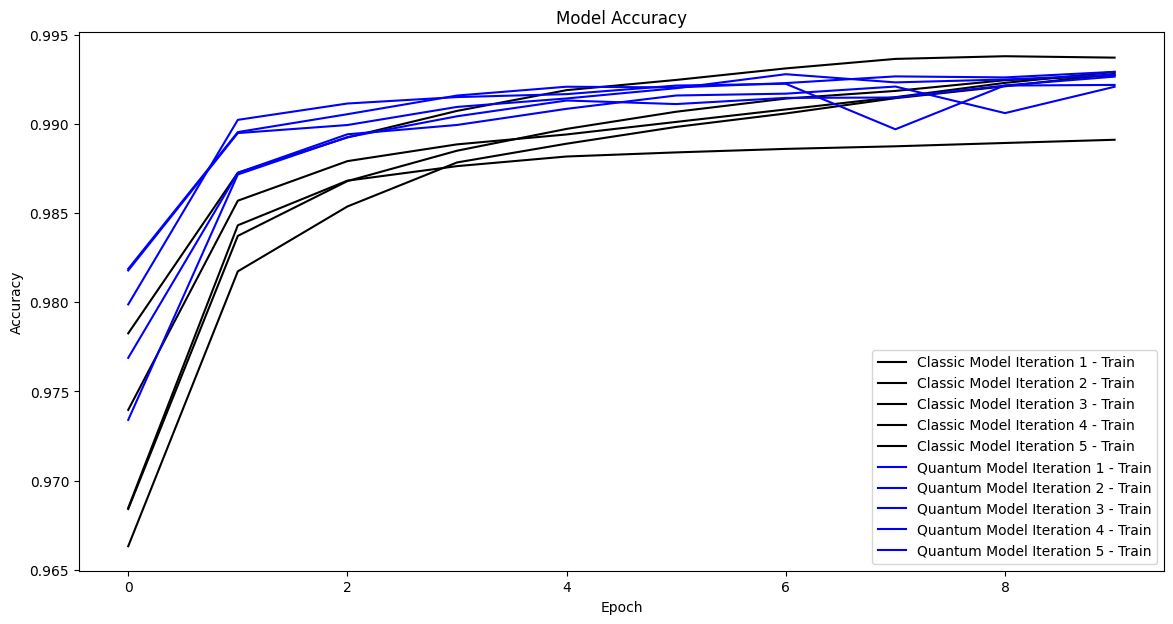

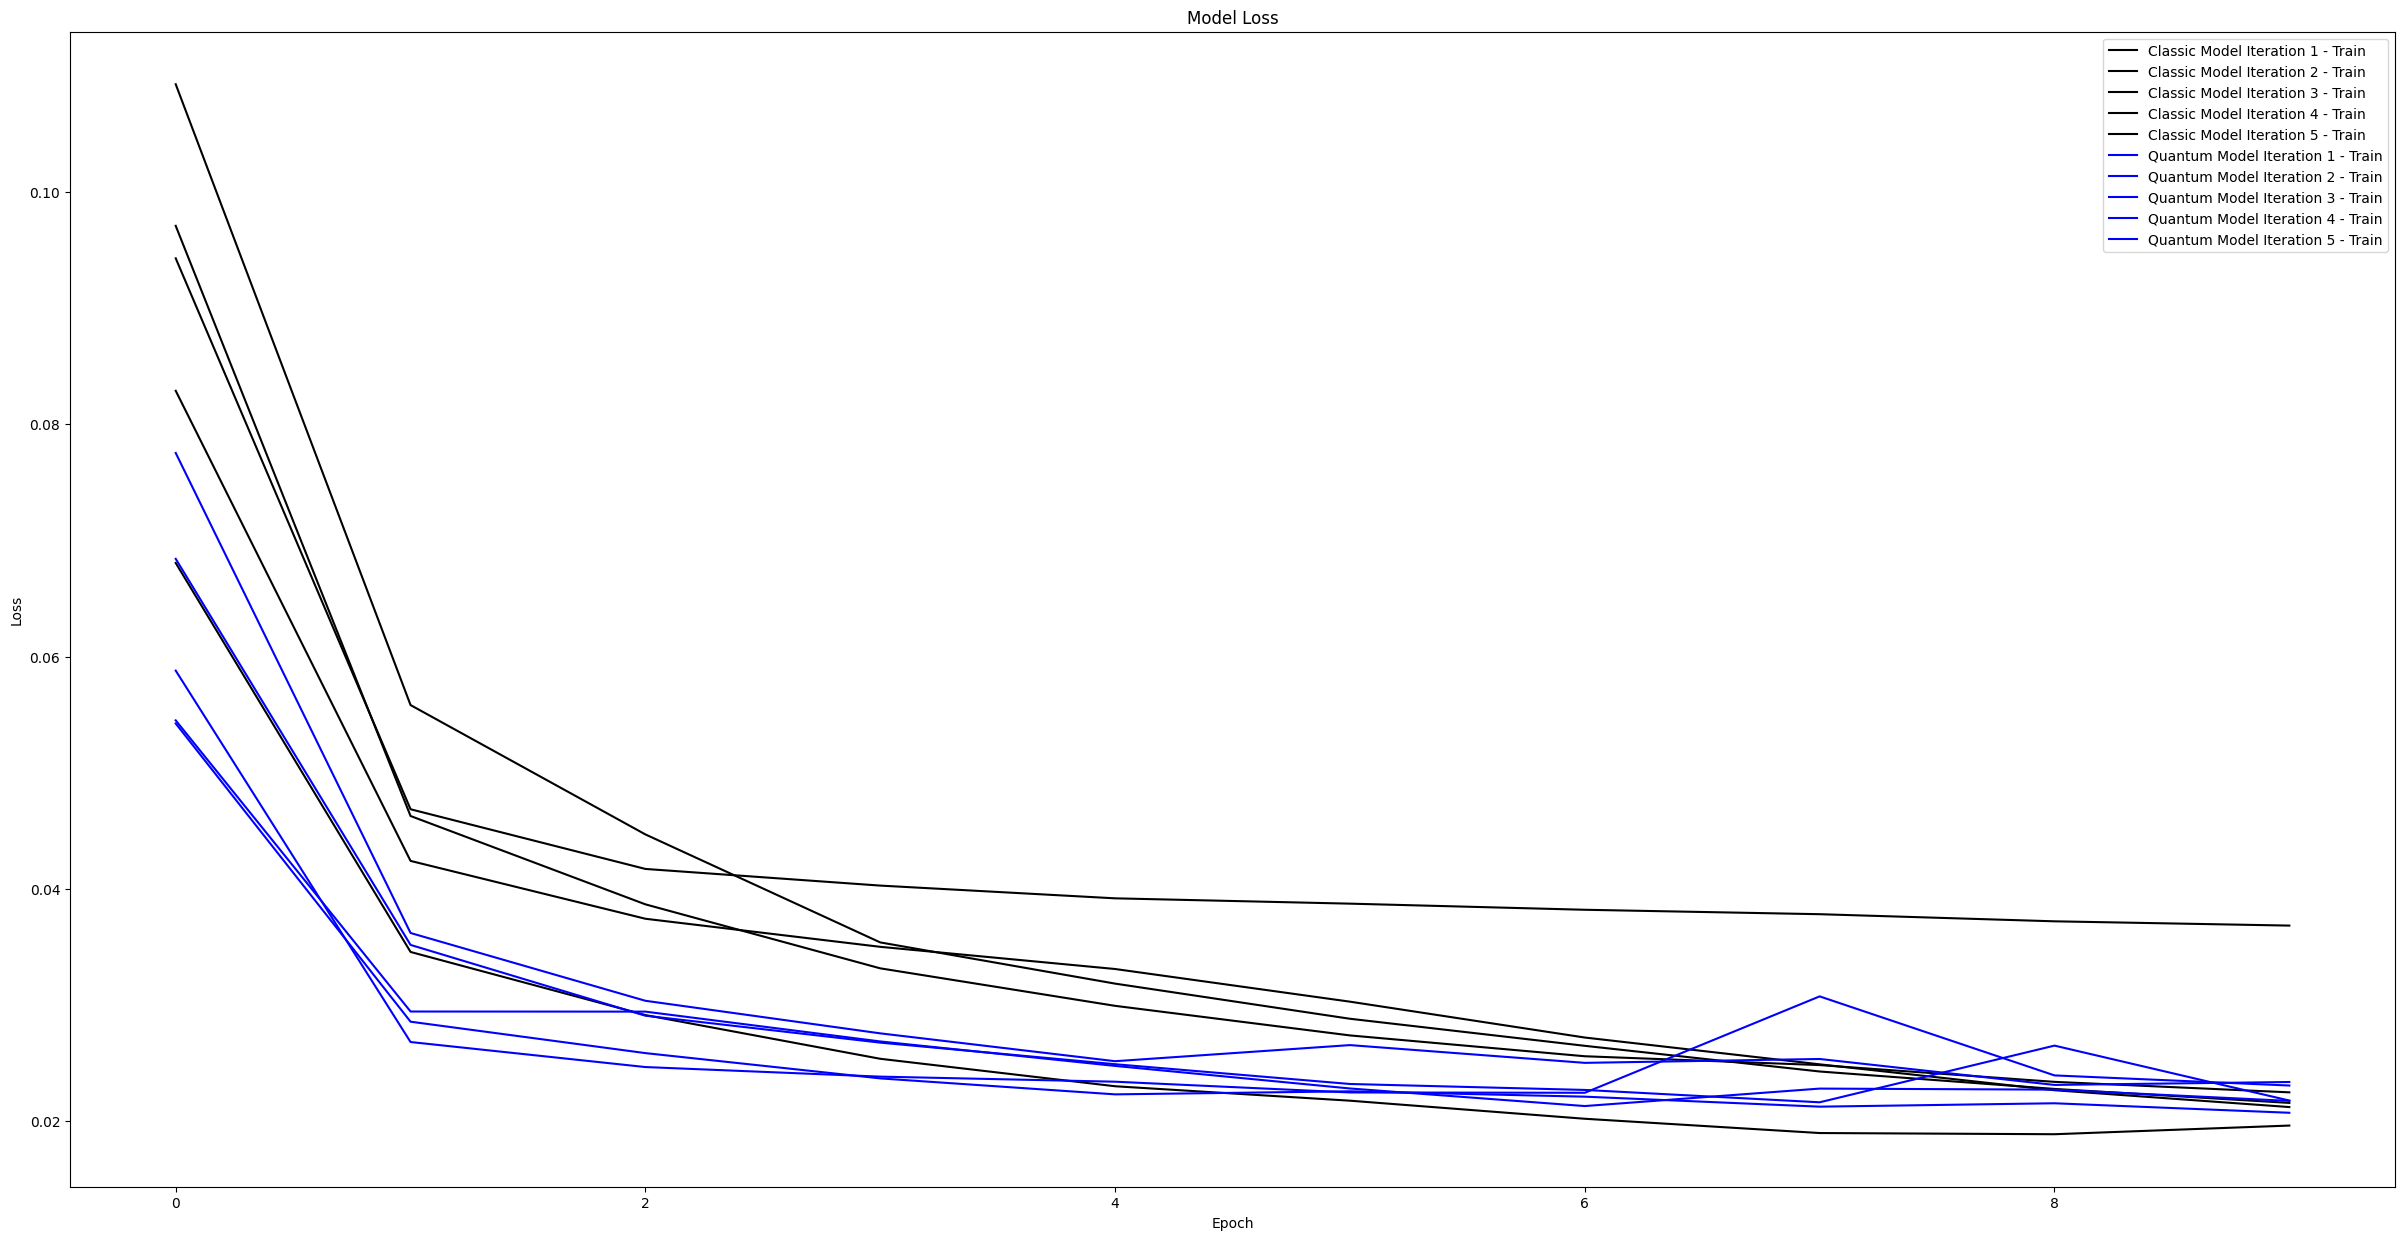

In [28]:
import glob
import json 
history_files = glob.glob("../experiment_7_long_layer/*_history.json")

# Initialize lists to store histories
classic_histories = []
quantum_histories = []

# Separate classic and quantum histories
for file in history_files:
    with open(file, "r") as f:
        history = json.load(f)
        if "classic_model" in file:
            classic_histories.append(history)
        else:
            quantum_histories.append(history)

# Plot the histories
plt.figure(figsize=(14, 7))

# Plot classic model accuracies
for i, history in enumerate(classic_histories):
    plt.plot(history['accuracy'], label=f'Classic Model Iteration {i+1} - Train', color='black', linestyle='-')

# Plot quantum model accuracies
for i, history in enumerate(quantum_histories):
    plt.plot(history['accuracy'], label=f'Quantum Model Iteration {i+1} - Train', color='blue', linestyle='-')

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss histories
plt.figure(figsize=(30, 15))

# Plot classic model losses
for i, history in enumerate(classic_histories):
    plt.plot(history['loss'], label=f'Classic Model Iteration {i+1} - Train', color='black', linestyle='-')

# Plot quantum model losses
for i, history in enumerate(quantum_histories):
    plt.plot(history['loss'], label=f'Quantum Model Iteration {i+1} - Train', color='blue', linestyle='-')

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()